# ML Model to predict the AWS Product Category

## Import the necessary libraries

In [3]:
import string
import re
import nltk
import pandas as pd
import csv

from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('names')
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

## (A) Read the CSV file

In [5]:
df = pd.read_csv('drive/My Drive/input/cleanv0.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,87485.0,Amazon EC2,strange slow speed via http https many ec2 instances basically perform similar fashion think ever got decent speed one machine m3xlarge eucentral1...
1,87485.0,Amazon EC2,mrnch wondering ebs volume actually bottleneck m3xlarge instance type ebs optimized default supports ebs optimization enable optimization instance...
2,87485.0,Amazon EC2,insight happens iperf basically need load file furthermore access file another ec2 instance within region lightning fast suspecting drivers networ...
3,87484.0,Amazon EC2,status check fail every day created amazon linux instance installed wordpress taking help aws wordpress installing tutorials site running good fac...
4,87484.0,Amazon EC2,anyone look issue suggest/fix issue raj
5,87483.0,Amazon EC2,ebs modify volume type magnetic previous generation gp2 done volume type modifications magnetic gp2 without downtime aws type change happens backg...
6,87483.0,Amazon EC2,glad see able successfully migrate magnetic previous generation volume type gp2 latest generation one volumes remaining 200 volumes would host ora...
7,87482.0,Amazon EC2,default dns server match vpc cidr vpc cidr 101701120/21 create ec2 instance vpc default dhcp options default dns server assigned 10002 work resolv...
8,87482.0,Amazon EC2,ihor based ip cidr provided internal dns would 101701122 attempt dns query ip address let know works michael
9,87482.0,Amazon EC2,michael yes 101701122 works configured automatically default ihor


#### About the uncleaned data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461813 entries, 0 to 461812
Data columns (total 3 columns):
id             461811 non-null float64
label          461813 non-null object
description    461813 non-null object
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


In [7]:
df['label'].describe()

count         461813
unique             8
top       Amazon EC2
freq          293758
Name: label, dtype: object

#### Check the spread of across labels

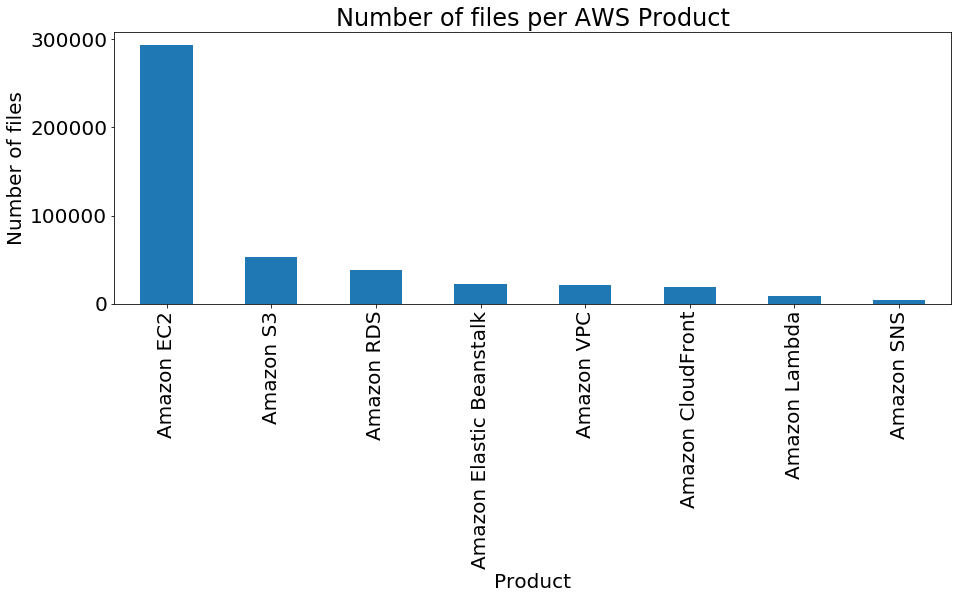

In [20]:
plt.figure(figsize=(15,5))
df.label.value_counts().plot(kind='bar');

plt.rcParams.update({'font.size': 20})
plt.title("Number of files per AWS Product")
plt.xlabel("Product")
plt.ylabel("Number of files")
plt.savefig('foo.png', bbox_inches='tight', dpi=100)

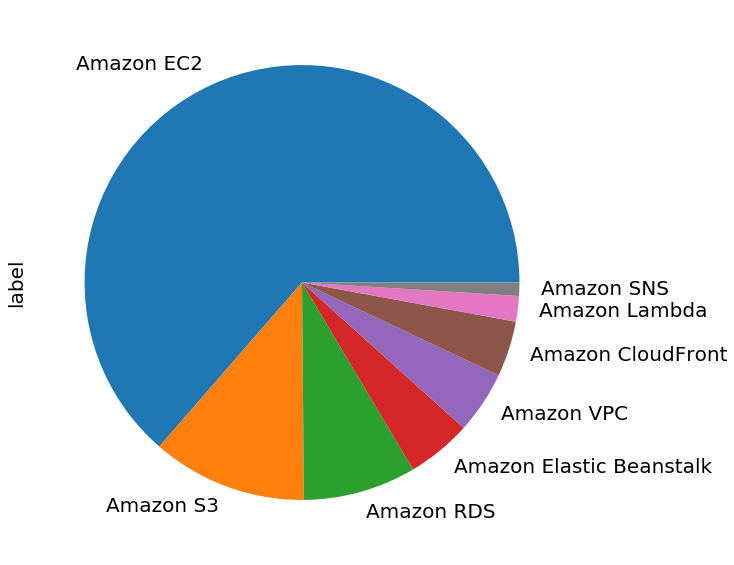

In [25]:
plt.figure(figsize=(10,10))
df.label.value_counts().plot(kind='pie');

#### Check out one sample post:

In [26]:
df['description'][10]

'unable migrate r3large r5large instance aws help need upgrade current r3large instance current generation r5large instance directly ami however try launch instance offering option upgrade older generation r4large also tried migrate r4large instance first hope would offered option migrate r5large however r5large offered upgrade r4large either anyone https://forumsawsamazoncom/ let know need advance running windows server 2012 r2 sql server standard'

#### Top 30 words w/ frequency

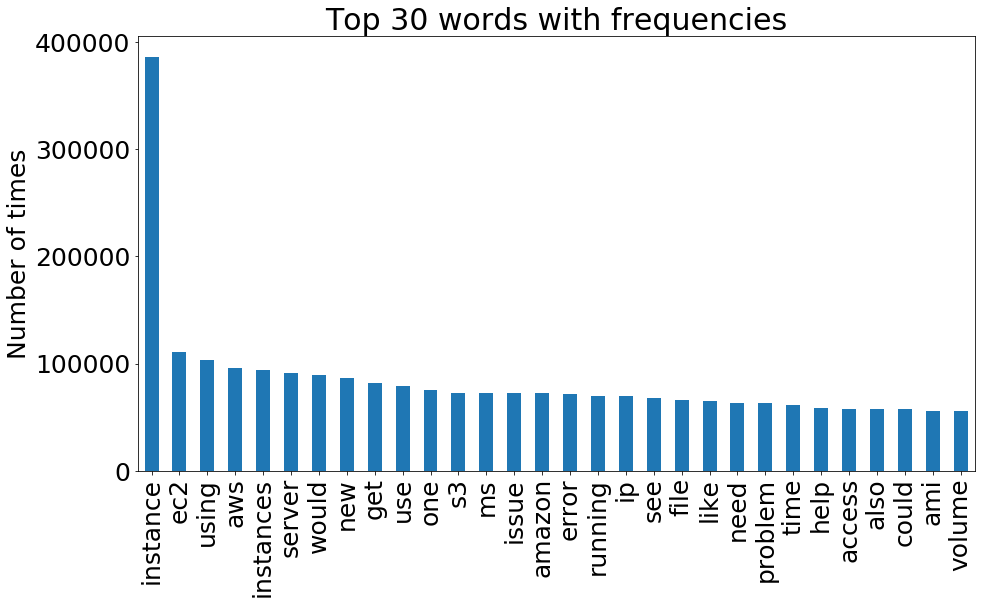

In [28]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(15,8))

plt.title("Top 30 words with frequencies")
plt.ylabel("Number of times")

freq.plot(kind="bar")

In [29]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words.")

There are totally 20520565 words.


## (B) Feature Engineering + Model Deployment

In [0]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,2), stop_words = "english")), ('clf', LogisticRegression(n_jobs = 1))])

logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [33]:
y_predict_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test,y_predict_logreg))

[[ 3631  1451    11    25    21   599     1     0]
 [  105 85488   364    37   528   968    18   638]
 [   10  2302  4147     1   147    94    10    43]
 [   32   717    37  1736    33   108    11    17]
 [    2  3276    36    15  8057    56     8    61]
 [  274  4356    30    31    42 11341     8     9]
 [    0   406     8    18    11    50   854     0]
 [    2  2526    22    16    87    29     4  3579]]


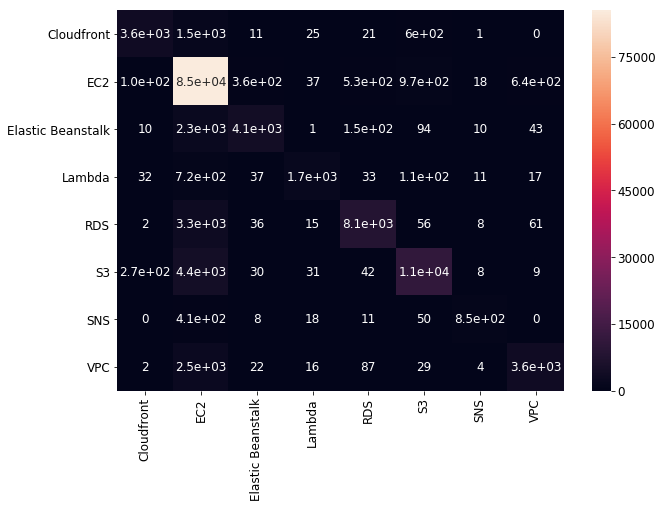

In [39]:
array = confusion_matrix(y_test, y_predict_logreg)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_logreg))
print('accuracy:', accuracy_score(y_predict_logreg, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.90      0.63      0.74      5739
              Amazon EC2       0.85      0.97      0.91     88146
Amazon Elastic Beanstalk       0.89      0.61      0.73      6754
           Amazon Lambda       0.92      0.65      0.76      2691
              Amazon RDS       0.90      0.70      0.79     11511
               Amazon S3       0.86      0.70      0.77     16091
              Amazon SNS       0.93      0.63      0.76      1347
              Amazon VPC       0.82      0.57      0.67      6265

                accuracy                           0.86    138544
               macro avg       0.88      0.68      0.77    138544
            weighted avg       0.86      0.86      0.85    138544

accuracy: 0.8577275089502252


#### Cross validating the test and train scores

In [36]:
y_train_predict_logreg = logreg.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_logreg))

[[  8983   3277     17     53     26    974      1      4]
 [   145 201866    488     40    749   1233     43   1048]
 [    21   4967   9980     12    207    184      9     71]
 [    54   1616     37   4049     56    201     36     31]
 [     2   6602     65     23  20329     83      4    131]
 [   458   8750     35     53     50  27786     13     14]
 [     2   1021      6     38     11     78   2063      1]
 [     2   5910     24     20    190     37      3   8987]]


In [37]:
print(classification_report(y_train, y_train_predict_logreg))
print('accuracy:', accuracy_score(y_train_predict_logreg, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.93      0.67      0.78     13335
              Amazon EC2       0.86      0.98      0.92    205612
Amazon Elastic Beanstalk       0.94      0.65      0.76     15451
           Amazon Lambda       0.94      0.67      0.78      6080
              Amazon RDS       0.94      0.75      0.83     27239
               Amazon S3       0.91      0.75      0.82     37159
              Amazon SNS       0.95      0.64      0.77      3220
              Amazon VPC       0.87      0.59      0.71     15173

                accuracy                           0.88    323269
               macro avg       0.92      0.71      0.80    323269
            weighted avg       0.88      0.88      0.87    323269

accuracy: 0.8786583309875058


The accuracy of the model on test data is 83.2% and 85.7% on the train data. We can conclude that the model is not overfitted

### SVM Model

In [40]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,2), stop_words = "english")), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
           

In [41]:
y_predict_svm = svm.predict(X_test)
print(confusion_matrix(y_test, y_predict_svm))

[[ 3960  1109    14    30    22   598     1     5]
 [  170 84856   436    60   622  1287    33   682]
 [   16  1808  4657    10   115    96    11    41]
 [   29   485    42  1952    39   117    14    13]
 [    7  2080    51     9  9250    52     9    53]
 [  297  3550    59    43    61 12052    13    16]
 [    4   267    13    17    11    49   983     3]
 [    5  2231    32    23    92    50     4  3828]]


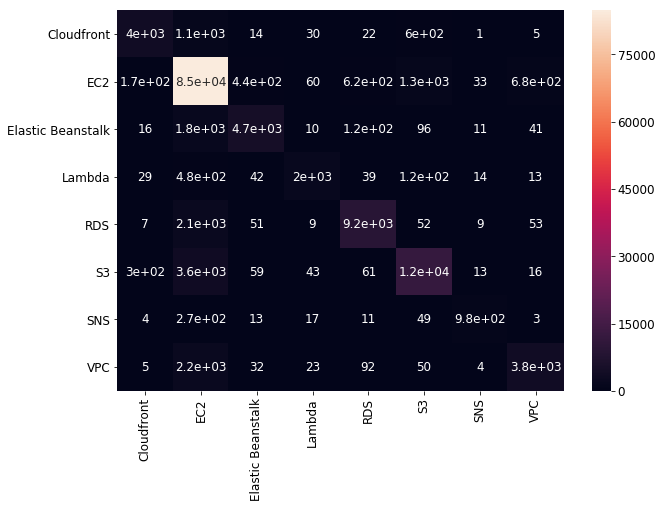

In [42]:
array = confusion_matrix(y_test, y_predict_svm)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [43]:
print(classification_report(y_test, y_predict_svm))
print('accuracy:', accuracy_score(y_predict_svm, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.88      0.69      0.77      5739
              Amazon EC2       0.88      0.96      0.92     88146
Amazon Elastic Beanstalk       0.88      0.69      0.77      6754
           Amazon Lambda       0.91      0.73      0.81      2691
              Amazon RDS       0.91      0.80      0.85     11511
               Amazon S3       0.84      0.75      0.79     16091
              Amazon SNS       0.92      0.73      0.81      1347
              Amazon VPC       0.82      0.61      0.70      6265

                accuracy                           0.88    138544
               macro avg       0.88      0.75      0.80    138544
            weighted avg       0.88      0.88      0.87    138544

accuracy: 0.8772519921468992


#### Cross validating the test and train scores

In [44]:
y_train_predict_svm = svm.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_svm))

[[ 12950    312      5      1      9     56      0      2]
 [    26 204980     80     16    164    143      8    195]
 [     6    428  14986      3     15      8      1      4]
 [     2    157      2   5905      3      8      1      2]
 [     1    652     13      3  26547     11      1     11]
 [    80    763     14      9     18  36269      3      3]
 [     3     74      1      6      2      0   3134      0]
 [     2    675      5      7     28      3      1  14452]]


In [45]:
print(classification_report(y_train, y_train_predict_svm))
print('accuracy:', accuracy_score(y_train_predict_svm, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.99      0.97      0.98     13335
              Amazon EC2       0.99      1.00      0.99    205612
Amazon Elastic Beanstalk       0.99      0.97      0.98     15451
           Amazon Lambda       0.99      0.97      0.98      6080
              Amazon RDS       0.99      0.97      0.98     27239
               Amazon S3       0.99      0.98      0.98     37159
              Amazon SNS       1.00      0.97      0.98      3220
              Amazon VPC       0.99      0.95      0.97     15173

                accuracy                           0.99    323269
               macro avg       0.99      0.97      0.98    323269
            weighted avg       0.99      0.99      0.99    323269

accuracy: 0.9874841076626587


**Clearly, the SVM model is being overfitted. While test accuracy is 85.5%, the train accuracy is nearly 99%.**

## (C) Cross Validation, Hyper Parameter Tuning

## (D) Save Model to .pkl file

In [0]:
import pickle
filename = 'drive/My Drive/Colab Notebooks/saved-models/logreg_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [0]:
filename = 'drive/My Drive/Colab Notebooks/saved-models/svm_model.pkl'
pickle.dump(svm, open(filename, 'wb'))